In [1]:
import yfinance as yf
import numpy as np
import pandas as pd 
import datetime as dt
import pylab 
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
import seaborn as sns

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend='plotly'
yf.pdr_override()

In [2]:
end= dt.datetime.now()
start=dt.datetime(2014,1,15)

df=pdr.get_data_yahoo('TSLA',start,end)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-15,11.230000,11.482000,10.806667,10.942000,10.942000,306984000
2014-01-16,10.833333,11.513333,10.826667,11.398000,11.398000,179391000
2014-01-17,11.346000,11.546667,11.196667,11.334000,11.334000,138093000
2014-01-21,11.416000,11.819333,11.387333,11.778667,11.778667,146020500
2014-01-22,11.854000,12.021333,11.650667,11.904000,11.904000,105339000


In [3]:
simple_returns=df.Close.pct_change().dropna()
simple_returns

Date
2014-01-16    0.041674
2014-01-17   -0.005615
2014-01-21    0.039233
2014-01-22    0.010641
2014-01-23    0.016465
                ...   
2023-04-05   -0.036660
2023-04-06   -0.002480
2023-04-10   -0.002972
2023-04-11    0.012357
2023-04-12   -0.033460
Name: Close, Length: 2325, dtype: float64

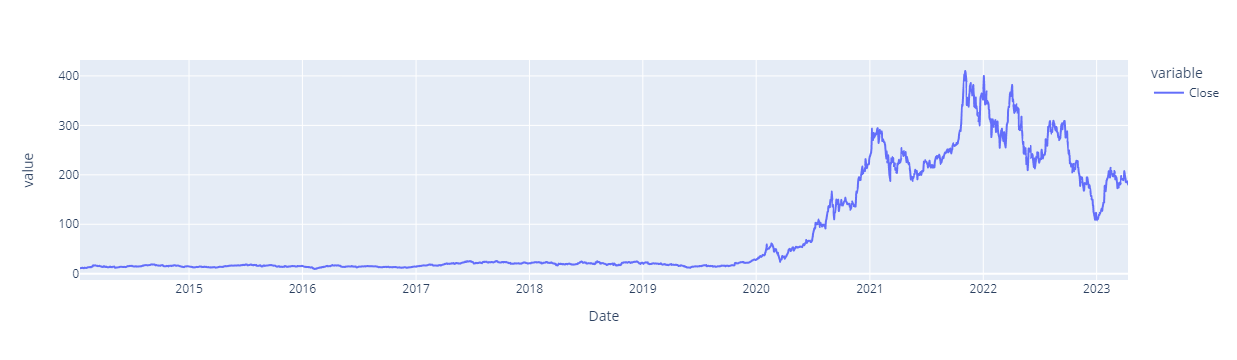

In [4]:
df.Close.plot().update_layout(autosize=False,width=500,height=300)
#print('First price',df.Close[0],'Last price',df.Clos

In [5]:
simple_returns.mean()
#Does not work using mean simple return to get the last price
df.Close[0]*(1+simple_returns.mean())**len(simple_returns)

764.8582022683121

In [6]:
df.Close[0]*np.prod([(1+Rt) for Rt in simple_returns])

180.53999328613165

In [7]:
#using log return
#Close.shift(1) means the day before
log_returns=np.log((df.Close/df.Close.shift(1)).dropna())
log_returns

Date
2014-01-16    0.040829
2014-01-17   -0.005631
2014-01-21    0.038483
2014-01-22    0.010584
2014-01-23    0.016331
                ...   
2023-04-05   -0.037349
2023-04-06   -0.002483
2023-04-10   -0.002976
2023-04-11    0.012281
2023-04-12   -0.034033
Name: Close, Length: 2325, dtype: float64

In [8]:
log_returns.mean()
df.Close[0]*np.exp(log_returns.mean()*len(log_returns))

180.53999328613233

In [9]:
# SIMPLE RETURNS: The product of normally distribution variables is NOT normally distributed
# LOG RETURNS: The sum of normally distributed variables follows a normal distribution
# Also the log distribution bounds our stock price at 0. Which is a nice property to have and is consistent with reality

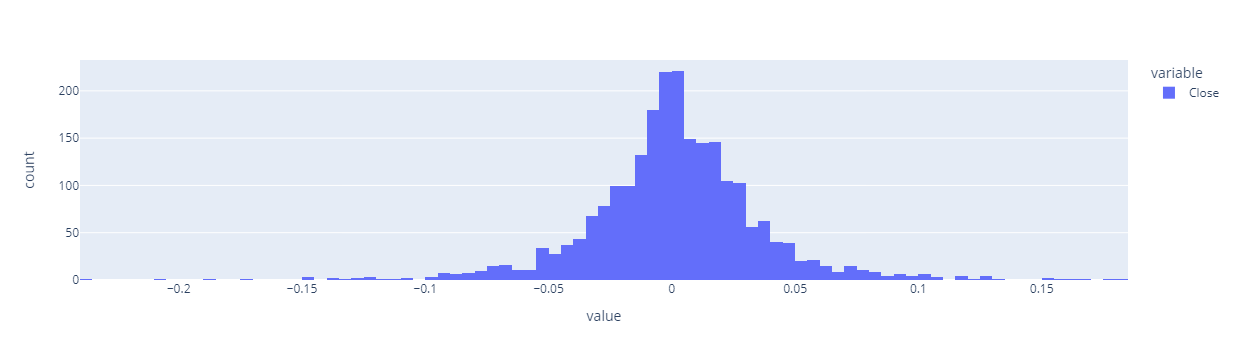

In [10]:
#Histogram
log_returns.plot(kind='hist').update_layout(autosize=False,width=500,height=300)

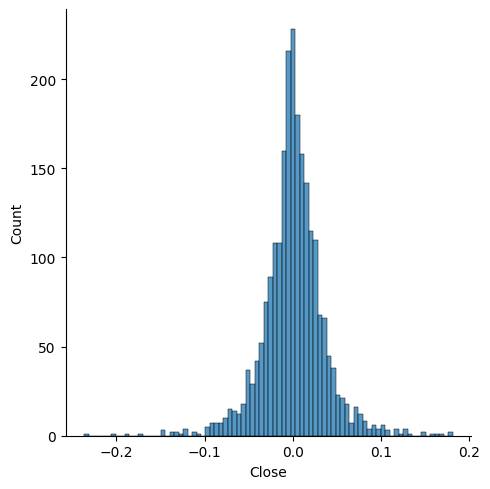

In [11]:
sns.displot(log_returns)

Q-Q Plot


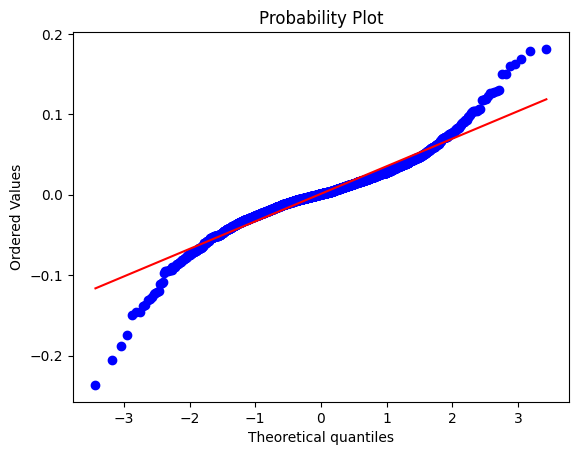

In [12]:
#Quantile quantile plot Q-Q plot
stats.probplot(log_returns,dist='norm',plot=pylab)
#print()
print('Q-Q Plot')

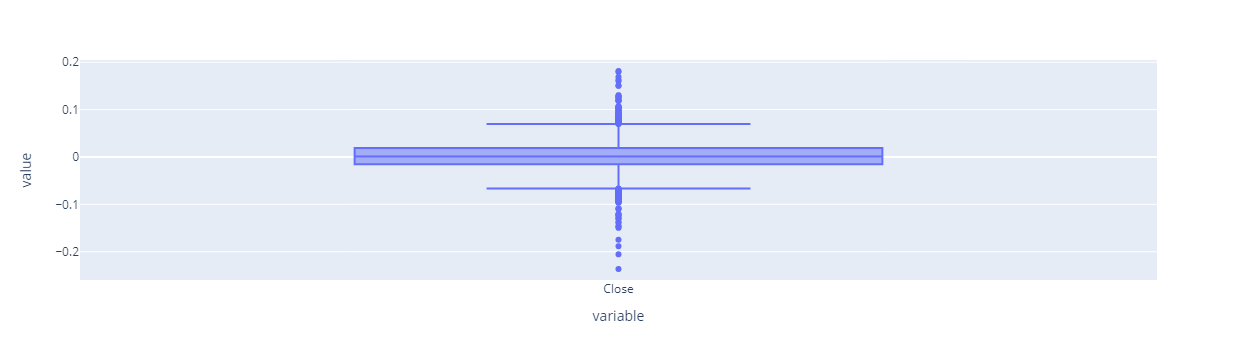

In [13]:
#Box using plotly
log_returns.plot(kind='box').update_layout(autosize=False,width=500,height=300)

<Axes: xlabel='Close'>

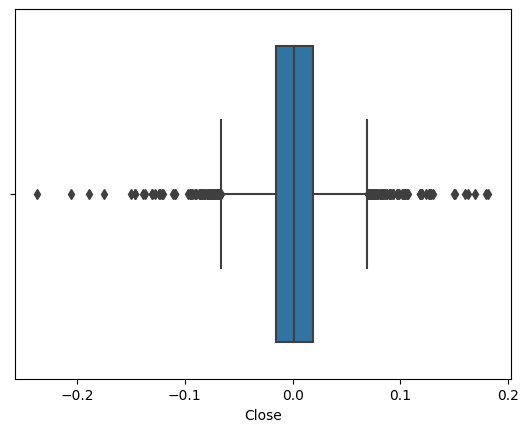

In [14]:
#box using seaborn
sns.boxplot(x=log_returns)

In [15]:
#Shapiro-Wilk Test
sw_stat, p = stats.shapiro(log_returns)
print('stat=%.3f, p=%.3f' % (sw_stat, p))
if p> 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.942, p=0.000
Probably not Gaussian


In [16]:
#jarque-Bera - test only works for a large enough number of data samples (>2000)
from scipy.stats import jarque_bera
jb_stat,p1= jarque_bera(log_returns)
print ('log_returns=%.20f,p=%.20f\n'%(jb_stat,p1))
if p1> 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

log_returns=2060.28268201073115051258,p=0.00000000000000000000

Probably not Gaussian


In [17]:
#Kolmogorov-Smirnov test
ks_statistic, p_value = stats.kstest(log_returns, 'norm', args = (log_returns.mean(), log_returns.std()))
print(ks_statistic,',', p_value)
if p_value > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

0.07132566451094713 , 9.906878819540017e-11
Probably not Gaussian
